<a href="https://colab.research.google.com/github/raz0208/City-Person-Dataset-EDA/blob/main/CityPersonDatasetEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CityPerson Dataset EDA (Exploratory Data Analysis)**
A complete EDA (Exploratory Data Analysis) for CityPerson dataset

## Used Dataset:


*   gtFine_trainvaltest
*   gtFinePanopticParts_trainval

## Step 1: Extract and read the datasets

In [60]:
# Instal Required Libraries
import zipfile
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import numpy as np
import pandas as pd
import json

In [61]:
# Dataset zip files path from Google Drive
gtFine = '/content/drive/MyDrive/CityPersonDataset/gtFine_trainvaltest.zip'
gtFinePanopticParts = '/content/drive/MyDrive/CityPersonDataset/gtFinePanopticParts_trainval.zip'

gtFine_ExtPath = '/content/CityPersonDataset/gtFine_trainvaltest'
gtFinePano_ExtPath = '/content/CityPersonDataset/gtFinePanopticParts_trainval'

In [62]:
# Extracting files function
def extract_zip(file_path, extract_path):
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Extract both datasets zip files
extract_zip(gtFine, gtFine_ExtPath)
extract_zip(gtFinePanopticParts, gtFinePano_ExtPath)

## Dataset Structure:

1.   gtFine_trainvaltest
  *   Contains PNG and JSON files.
  *   Organized by:
       * Train, validation, and test folders.
  *   Files Type:
      * *_color.png: Color-coded images for segmentation.
      * *_instanceIds.png: Encoded image masks where each pedestrian is represented with a unique ID.
      * *_labelIds.png: Encoded image masks for class labels.
      * *_polygons.json: Contains polygonal annotations for semantic segmentation, instance
2. gtFinePanopticParts_trainval:
    * Contains TIF files.
    * Organized similarly to gtFine_trainvaltest.
    * File type:
      * *_gtFinePanopticParts.tif: Panoptic segmentation with part-level annotations (e.g., parts of a pedestrian like arms or legs).

In [63]:
# List the extracted content from both datasets
gtFine_Files = os.listdir(gtFine_ExtPath)
gtFinepano_Files = os.listdir(gtFinePano_ExtPath)

gtFine_Files, gtFinepano_Files

(['gtFine', 'license.txt', 'README'],
 ['README_panopticParts.md', 'gtFinePanopticParts', 'license.txt'])

In [64]:
# Path to core folder
gtFine_CorePath = os.path.join(gtFine_ExtPath, 'gtFine')
gtFinePano_CorePath = os.path.join(gtFinePano_ExtPath, 'gtFinePanopticParts')

# List driectories inside core folders
gtFine_Dirs = os.listdir(gtFine_CorePath) if os.path.exists(gtFine_CorePath) else []
gtFinePano_Dirs = os.listdir(gtFinePano_CorePath) if os.path.exists(gtFinePano_CorePath) else []

gtFine_Dirs, gtFinePano_Dirs

(['test', 'train', 'val'], ['train', 'val'])

In [65]:
# Define the subdirectories
subdirs = gtFine_Dirs #["train", "val", "test"]

# Initialize dictionaries to store samples from each subdirectory
gtFine_CityFolders = {}
gtFinePano_CityFolders = {}

# Process each subdirectory
for subdir in subdirs:
    gtFine_CityFolders[subdir] = os.listdir(os.path.join(gtFine_CorePath, subdir)) if subdir in gtFine_Dirs else []
    gtFinePano_CityFolders[subdir] = os.listdir(os.path.join(gtFinePano_CorePath, subdir)) if subdir in gtFinePano_Dirs else []

# Output the first few files for each subdirectory
gtFine_CityFolders_Preview = {key: value[:] for key, value in gtFine_CityFolders.items()}
gtFinePano_CityFolders_Preview = {key: value[:] for key, value in gtFinePano_CityFolders.items()}

gtFine_CityFolders_Preview, gtFinePano_CityFolders_Preview

({'test': ['bonn', 'munich', 'bielefeld', 'berlin', 'leverkusen', 'mainz'],
  'train': ['strasbourg',
   'tubingen',
   'hamburg',
   'cologne',
   'darmstadt',
   'weimar',
   'jena',
   'monchengladbach',
   'krefeld',
   'ulm',
   'dusseldorf',
   'stuttgart',
   'zurich',
   'erfurt',
   'aachen',
   'hanover',
   'bremen',
   'bochum'],
  'val': ['munster', 'lindau', 'frankfurt']},
 {'test': [],
  'train': ['strasbourg',
   'tubingen',
   'hamburg',
   'cologne',
   'darmstadt',
   'weimar',
   'jena',
   'monchengladbach',
   'krefeld',
   'ulm',
   'dusseldorf',
   'stuttgart',
   'zurich',
   'erfurt',
   'aachen',
   'hanover',
   'bremen',
   'bochum'],
  'val': ['munster', 'lindau', 'frankfurt']})

In [66]:
def count_file_types(directory):
    """
    Count the distribution of file types in a given directory.
    :param directory: Path to the directory to analyze.
    :return: Dictionary of file types and their counts.
    """
    file_type_counts = Counter()
    for root, _, files in os.walk(directory):
        for file in files:
            ext = os.path.splitext(file)[-1].lower()
            file_type_counts[ext] += 1
    return file_type_counts

# Analyze file type distribution for gtFine dataset
print("File Type Distribution in gtFine Dataset:")
gtFine_file_types = count_file_types(gtFine_CorePath)
print(pd.DataFrame(gtFine_file_types.items(), columns=["File Type", "Count"]))

# Analyze file type distribution for gtFinePanopticParts dataset
print("\nFile Type Distribution in gtFinePanopticParts Dataset:")
gtFinePano_file_types = count_file_types(gtFinePano_CorePath)
print(pd.DataFrame(gtFinePano_file_types.items(), columns=["File Type", "Count"]))

File Type Distribution in gtFine Dataset:
  File Type  Count
0     .json   5000
1      .png  15000

File Type Distribution in gtFinePanopticParts Dataset:
  File Type  Count
0      .tif   3475


## Files structure

For example: the file structure in the "bochum" city directory confirms the expected dataset formats and relationships:

1. gtFine Dataset (bochum):
    - Files include:
       - Color-coded images (e.g., bochum_000000_000313_gtFine_color.png).
       - Instance masks (e.g., bochum_000000_000313_gtFine_instanceIds.png).
       - Label masks (e.g., bochum_000000_000313_gtFine_labelIds.png).
       - Polygon annotations (e.g., bochum_000000_000313_gtFine_polygons.json).

2. gtFinePanopticParts Dataset (bochum):
    - Files include:
      - Panoptic segmentation with part-level detail (e.g., bochum_000000_000313_gtFinePanopticParts.tif).

## Observed Relationship:
- The filenames match across datasets, indicating alignment.
  - For example: bochum_000000_000313_gtFinePanopticParts.tif aligns with the corresponding files in gtFine for color, instance, label, and polygons.

In [67]:
# Validate image and annotation files

# Select 3 cities name randomly from 'train' folder to check files
selected_cities = random.sample(gtFine_CityFolders['train'], 3)

# List files for each selected city
gtFine_city_files = {}
gtFinePano_city_files = {}
gtFine_city_files_sorted = {}
gtFinePano_city_files_sorted = {}

for city in selected_cities:
    gtFine_city_path = os.path.join(gtFine_CorePath, "train", city)
    gtFinePano_city_path = os.path.join(gtFinePano_CorePath, "train", city)

    gtFine_city_files[city] = sorted(os.listdir(gtFine_city_path) if os.path.exists(gtFine_city_path) else [])
    gtFinePano_city_files[city] = sorted(os.listdir(gtFinePano_city_path) if os.path.exists(gtFinePano_city_path) else [])

    gtFine_city_files_sorted[city] = gtFine_city_files[city][:4]
    gtFinePano_city_files_sorted[city] = gtFinePano_city_files[city][:1]

# Preview sample files for each city
gtFine_city_files_sorted, gtFinePano_city_files_sorted

({'zurich': ['zurich_000000_000019_gtFine_color.png',
   'zurich_000000_000019_gtFine_instanceIds.png',
   'zurich_000000_000019_gtFine_labelIds.png',
   'zurich_000000_000019_gtFine_polygons.json'],
  'darmstadt': ['darmstadt_000000_000019_gtFine_color.png',
   'darmstadt_000000_000019_gtFine_instanceIds.png',
   'darmstadt_000000_000019_gtFine_labelIds.png',
   'darmstadt_000000_000019_gtFine_polygons.json'],
  'hamburg': ['hamburg_000000_000042_gtFine_color.png',
   'hamburg_000000_000042_gtFine_instanceIds.png',
   'hamburg_000000_000042_gtFine_labelIds.png',
   'hamburg_000000_000042_gtFine_polygons.json']},
 {'zurich': ['zurich_000000_000019_gtFinePanopticParts.tif'],
  'darmstadt': ['darmstadt_000000_000019_gtFinePanopticParts.tif'],
  'hamburg': ['hamburg_000000_000042_gtFinePanopticParts.tif']})

### Visualize sample images and annotations

The visualization showcases the following:

1. Color Image: A standard RGB image representing the scene.
2. Instance Mask: Encoded segmentation where each pedestrian instance is uniquely labeled.
3. Panoptic Segmentation: A TIF file providing part-level segmentation for pedestrians (e.g., distinguishing arms, legs, etc.).

This confirms the alignment between datasets and their usability for pedestrian detection tasks.

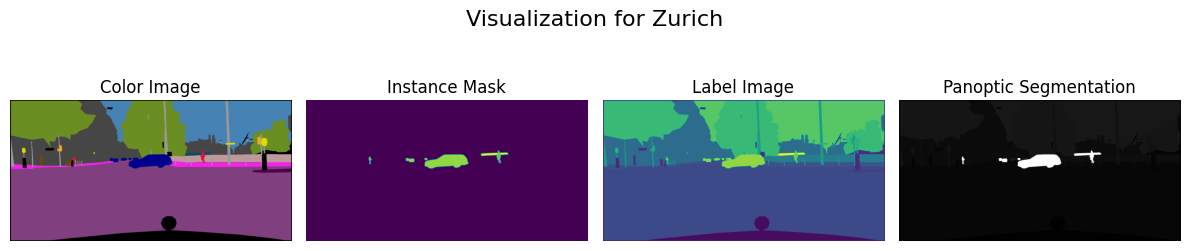

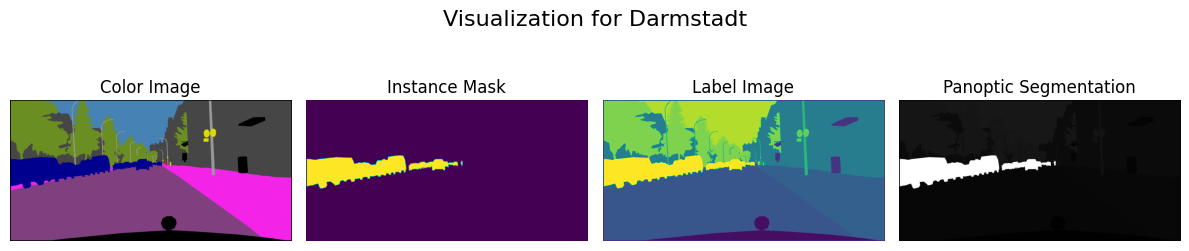

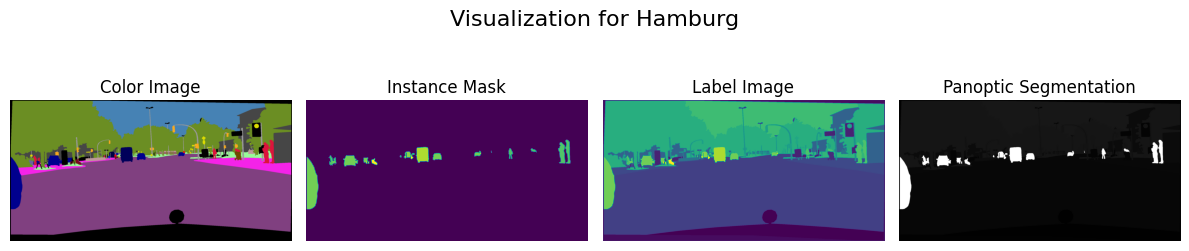

In [68]:
# File paths for sample images from selected cities
for city in selected_cities:
  # Geting files path
  color_image_path = os.path.join('/content/CityPersonDataset/gtFine_trainvaltest/gtFine/train/', city, gtFine_city_files_sorted[city][0]) # '_gtFine_color.png'
  instance_image_path = os.path.join('/content/CityPersonDataset/gtFine_trainvaltest/gtFine/train/', city, gtFine_city_files_sorted[city][1]) # '_gtFine_instanceIds.png'
  labelIds_image_path = os.path.join('/content/CityPersonDataset/gtFine_trainvaltest/gtFine/train/', city, gtFine_city_files_sorted[city][2]) # '_gtFine_labelIds.png'
  panoptic_image_path = os.path.join('/content/CityPersonDataset/gtFinePanopticParts_trainval/gtFinePanopticParts/train/', city, gtFinePano_city_files_sorted[city][0]) # '_gtFinePanopticParts.tif'

  # Loading images
  color_image = Image.open(color_image_path)
  instance_image = Image.open(instance_image_path)
  label_image = Image.open(labelIds_image_path)
  panoptic_image = Image.open(panoptic_image_path)

  # Display the images
  fig, axs = plt.subplots(1, 4, figsize=(12, 3))
  fig.suptitle(f"Visualization for {city.capitalize()}", fontsize=16)

  axs[0].imshow(color_image)
  axs[0].set_title('Color Image')
  axs[0].axis('off')

  axs[1].imshow(instance_image, cmap='viridis')
  axs[1].set_title('Instance Mask')
  axs[1].axis('off')

  axs[2].imshow(label_image, cmap='viridis')
  axs[2].set_title('Label Image')
  axs[2].axis('off')

  axs[3].imshow(panoptic_image, cmap='viridis')
  axs[3].set_title('Panoptic Segmentation')
  axs[3].axis('off')

  plt.tight_layout()
  plt.show()

In [69]:
def parse_json_file(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    print("Keys in JSON file:", data.keys())
    return data

Randomly Selected JSON file: /content/CityPersonDataset/gtFine_trainvaltest/gtFine/train/zurich/zurich_000013_000019_gtFine_polygons.json
Keys in JSON file: dict_keys(['imgHeight', 'imgWidth', 'objects'])
Corresponding TIF file: /content/CityPersonDataset/gtFinePanopticParts_trainval/gtFinePanopticParts/train/zurich/zurich_000013_000019_gtFinePanopticParts.tif


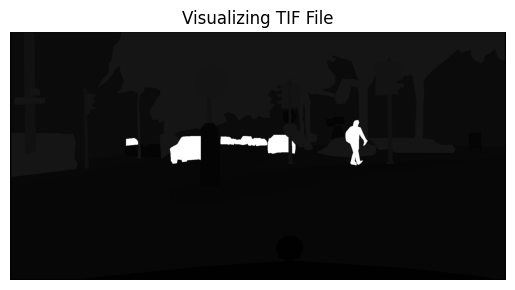

In [90]:
### Repeated code for json files
# # Randomly select a JSON file from gtFine
# json_files = []
# for root, _, files in os.walk(gtFine_CorePath):
#     for file in files:
#         if file.endswith('.json'):
#             json_files.append(os.path.join(root, file))
###

# Randomly select a JSON file from gtFine
json_files = []
for root, dirs, files in os.walk(gtFine_CorePath):
    # Exclude "test" folder
    dirs[:] = [d for d in dirs if d != "test"]
    for file in files:
        if file.endswith('.json'):
            json_files.append(os.path.join(root, file))

if not json_files:
    print("No JSON files found in gtFine dataset.")
else:
    sample_json = random.choice(json_files)
    print(f"Randomly Selected JSON file: {sample_json}")
    sample_data = parse_json_file(sample_json)

    # Derive the corresponding .tif file path in gtFinePanopticParts
    json_filename = os.path.basename(sample_json)
    tif_filename = json_filename.replace('_gtFine_polygons.json', '_gtFinePanopticParts.tif')

    tif_file_path = None
    for root, _, files in os.walk(gtFinePano_CorePath):
        for file in files:
            if file == tif_filename:
                tif_file_path = os.path.join(root, file)
                break
        if tif_file_path:
            break

    # Visualize the .tif file if it exists
    if tif_file_path:
        print(f"Corresponding TIF file: {tif_file_path}")
        tif_image = Image.open(tif_file_path)
        plt.imshow(tif_image)
        plt.title("Visualizing TIF File")
        plt.axis('off')  # Turn off axis for better visualization
        plt.show()
    else:
        print(f"No corresponding TIF file found for {sample_json}")

In [93]:
def display_annotation_summary(data):
    print("Annotation Summary:")
    print(f"Image Dimensions: {data['imgWidth']}x{data['imgHeight']}")
    print("Objects:")
    for obj in data['objects'][:10]:  # Limit to the first 10 objects for brevity
        print(f"- Label: {obj['label']}, Number of Points in Polygon: {len(obj['polygon'])}")

# Display the summary of the parsed JSON data
if sample_json:
    display_annotation_summary(sample_data)

Annotation Summary:
Image Dimensions: 2048x1024
Objects:
- Label: sidewalk, Number of Points in Polygon: 7
- Label: road, Number of Points in Polygon: 5
- Label: building, Number of Points in Polygon: 16
- Label: dynamic, Number of Points in Polygon: 6
- Label: car, Number of Points in Polygon: 8
- Label: sidewalk, Number of Points in Polygon: 21
- Label: sidewalk, Number of Points in Polygon: 5
- Label: static, Number of Points in Polygon: 8
- Label: vegetation, Number of Points in Polygon: 230
- Label: car, Number of Points in Polygon: 11


In [73]:
# Count images in each city folder
def count_images_in_cities(base_path):
    city_counts = {}
    if os.path.exists(base_path):
        for city in os.listdir(base_path):
            city_path = os.path.join(base_path, city)
            if os.path.isdir(city_path):
                image_count = len(os.listdir(city_path))
                city_counts[city] = (image_count, int(image_count / 4))
    return city_counts

# Count images in 'train' and 'val' splits for both datasets
gtFine_train_counts = count_images_in_cities(os.path.join(gtFine_CorePath, "train"))
gtFine_val_counts = count_images_in_cities(os.path.join(gtFine_CorePath, "val"))
gtFine_test_counts = count_images_in_cities(os.path.join(gtFine_CorePath, "test"))
gtFinePano_train_counts = count_images_in_cities(os.path.join(gtFinePano_CorePath, "train"))
gtFinePano_val_counts = count_images_in_cities(os.path.join(gtFinePano_CorePath, "val"))

# Create PANDAS dataframe
print("Name of the cities and number of unique IDs per city in gtFine dataset:")
# Save city image counts for gtFine dataset in pandas DataFrame
gtFine_city_trainImg_pd = pd.DataFrame([(city, count[0], count[1]) for city, count in gtFine_train_counts.items()], columns=["City", "FileCounts", "ImgPerUniqueID"])
gtFine_city_valImg_pd = pd.DataFrame([(city, count[0], count[1]) for city, count in gtFine_val_counts.items()], columns=["City", "FileCounts", "ImgPerUniqueID"])
gtFine_city_testImg_pd = pd.DataFrame([(city, count[0], count[1]) for city, count in gtFine_test_counts.items()], columns=["City", "FileCounts", "ImgPerUniqueID"])

# Print the gtFine DataFrame
print(gtFine_city_trainImg_pd)
print(gtFine_city_valImg_pd)
print(gtFine_city_testImg_pd)

print("\nName of the cities and number of unique IDs per city in gtFinePanopticParts dataset:")
# Save city image counts for gtFinePanopticParts dataset in pandas DataFrame
gtFinePano_city_trainImg_pd = pd.DataFrame([(city, count[0]) for city, count in gtFinePano_train_counts.items()], columns=["City", "ImageCounts"])
gtFinePano_city_valImg_pd = pd.DataFrame([(city, count[0]) for city, count in gtFinePano_val_counts.items()], columns=["City", "ImageCounts"])

# Print the gtFinePanopticParts DataFrame
print(gtFinePano_city_trainImg_pd)
print(gtFinePano_city_valImg_pd)

Name of the cities and number of unique IDs per city in gtFine dataset:
               City  FileCounts  ImgPerUniqueID
0        strasbourg        1460             365
1          tubingen         576             144
2           hamburg         992             248
3           cologne         616             154
4         darmstadt         340              85
5            weimar         568             142
6              jena         476             119
7   monchengladbach         376              94
8           krefeld         396              99
9               ulm         380              95
10       dusseldorf         884             221
11        stuttgart         784             196
12           zurich         488             122
13           erfurt         436             109
14           aachen         696             174
15          hanover         784             196
16           bremen        1264             316
17           bochum         384              96
        City  Fi

Visualizing gtFine dataset file counts...


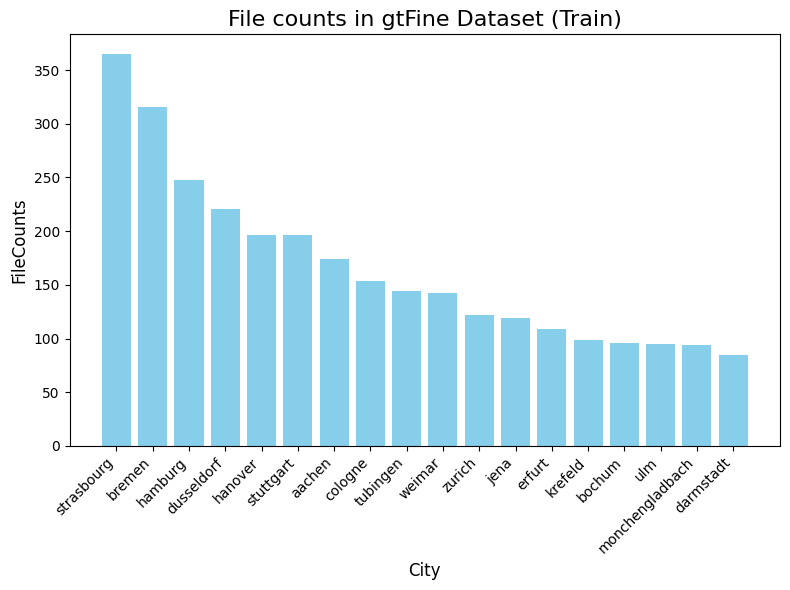

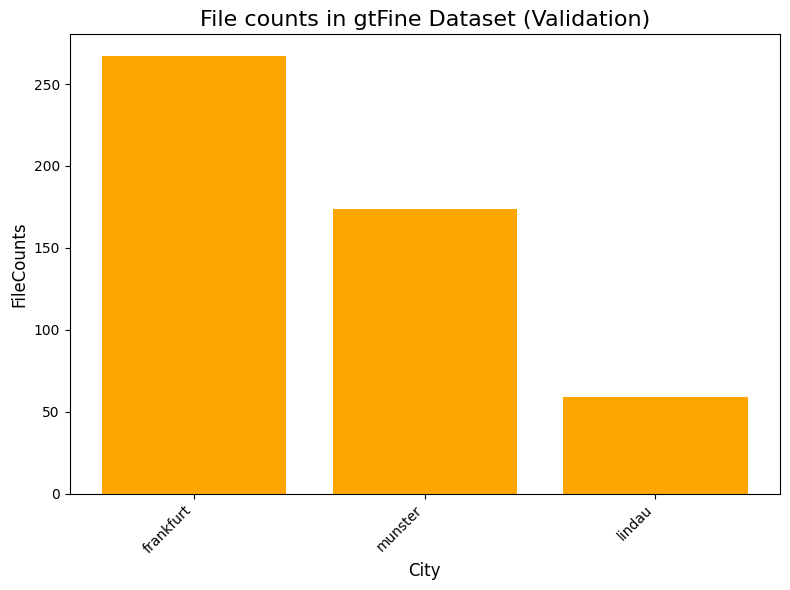

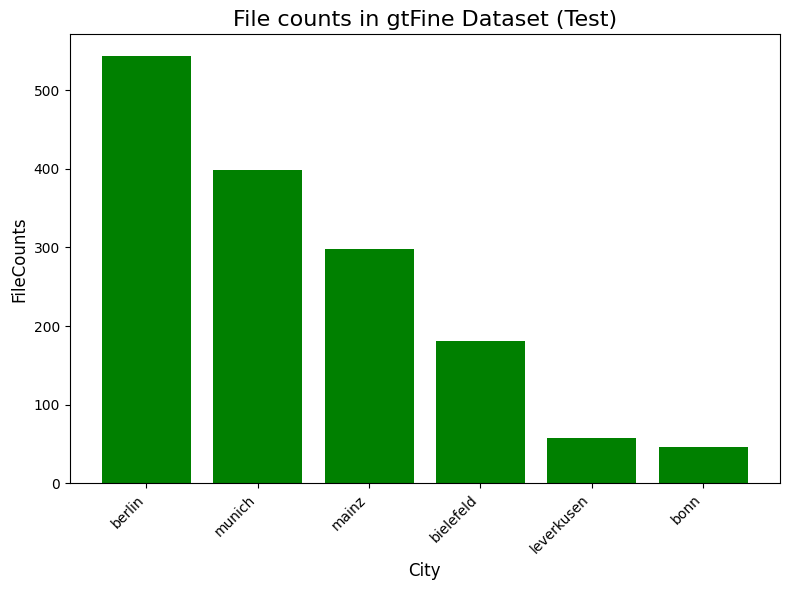

In [74]:
# Visualize cities name and the number of images per each unique ID
def gtFine_plot_city_counts(data, title, color):
    data.sort_values(by="FileCounts", ascending=False, inplace=True)
    plt.figure(figsize=(8, 6))
    plt.bar(data["City"], data["ImgPerUniqueID"], color=color)
    plt.xlabel("City", fontsize=12)
    plt.ylabel("FileCounts", fontsize=12)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.tight_layout()
    plt.show()

# Plotting for gtFine dataset
print("Visualizing gtFine dataset file counts...")
gtFine_plot_city_counts(gtFine_city_trainImg_pd, "File counts in gtFine Dataset (Train)", "skyblue")
gtFine_plot_city_counts(gtFine_city_valImg_pd, "File counts in gtFine Dataset (Validation)", "orange")
gtFine_plot_city_counts(gtFine_city_testImg_pd, "File counts in gtFine Dataset (Test)", "green")

Visualizing gtFinePanopticParts dataset image counts...


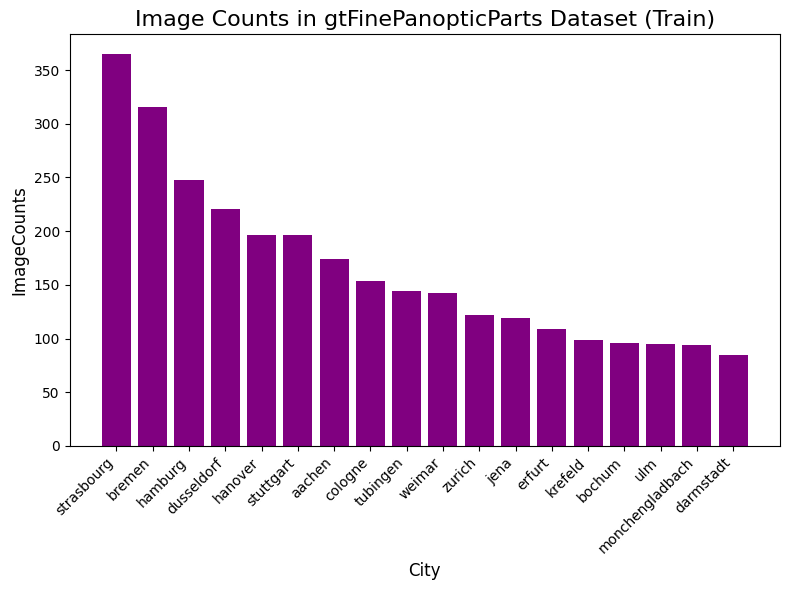

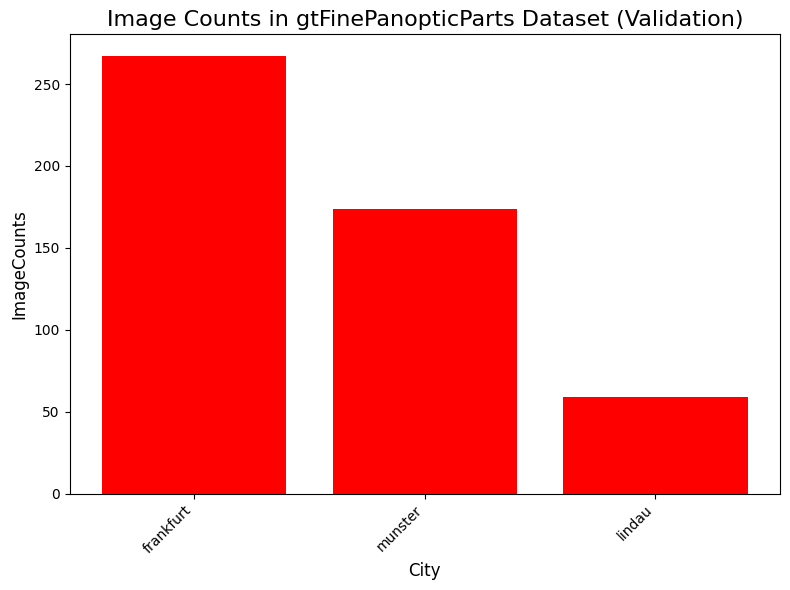

In [75]:
# Visualize cities name and the number of images per each unique ID
def gtFinePano_plot_city_counts(data, title, color):
    data.sort_values(by="ImageCounts", ascending=False, inplace=True)
    plt.figure(figsize=(8, 6))
    plt.bar(data["City"], data["ImageCounts"], color=color)
    plt.xlabel("City", fontsize=12)
    plt.ylabel("ImageCounts", fontsize=12)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.tight_layout()
    plt.show()

# Plotting for gtFinePanopticParts dataset
print("Visualizing gtFinePanopticParts dataset image counts...")
gtFinePano_plot_city_counts(gtFinePano_city_trainImg_pd, "Image Counts in gtFinePanopticParts Dataset (Train)", "purple")
gtFinePano_plot_city_counts(gtFinePano_city_valImg_pd, "Image Counts in gtFinePanopticParts Dataset (Validation)", "red")

Analyze the instance statistics for all cities in the train folder.


In [76]:
def analyze_instance_stats_in_train(gtFine_CorePath):
    instance_counts = {}
    train_path = os.path.join(gtFine_CorePath, "train")

    # Loop through all cities in the train folder
    for city in os.listdir(train_path):
        city_path = os.path.join(train_path, city)
        if not os.path.isdir(city_path):
            continue

        # Get instance image paths for the city
        instance_image_paths = [
            os.path.join(city_path, file)
            for file in os.listdir(city_path)
            if "_gtFine_instanceIds.png" in file
        ]

        # Count instances for each image
        city_instance_counts = []
        for img_path in instance_image_paths:
            instance_mask = np.array(Image.open(img_path))
            unique_ids = np.unique(instance_mask)
            city_instance_counts.append(len(unique_ids) - 1)  # Exclude background (id=0)

        # Store results
        instance_counts[city] = city_instance_counts

    return instance_counts

# Analyze instance statistics for all cities in the train folder
train_instance_counts = analyze_instance_stats_in_train(gtFine_CorePath)

# Flatten instance counts across all cities
all_instance_counts = [count for city_counts in train_instance_counts.values() for count in city_counts]

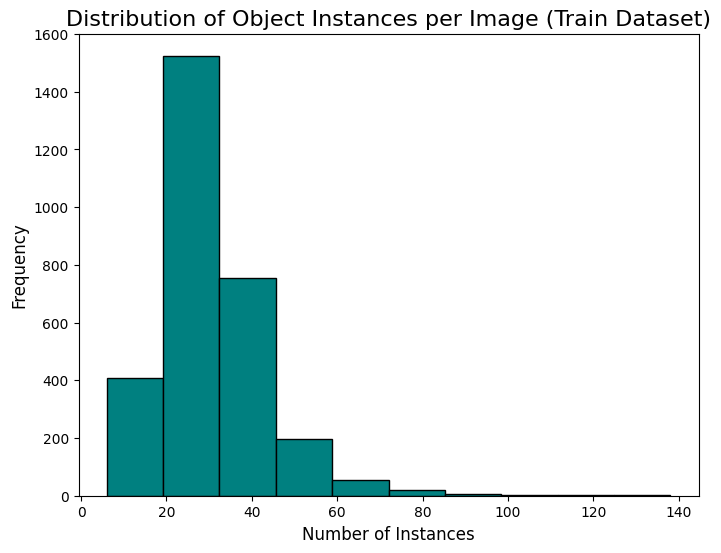

,Statistic,Value
0,Total Images,2975.000000
1,Mean Instances per Image,30.721681
2,Median Instances per Image,29.000000
3,Max Instances in an Image,138.000000
4,Min Instances in an Image,6.000000


In [77]:
# Plot the distribution of instances
plt.figure(figsize=(8, 6))
plt.hist(all_instance_counts, bins=10, color='teal', edgecolor='black')
plt.title("Distribution of Object Instances per Image (Train Dataset)", fontsize=16)
plt.xlabel("Number of Instances", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Display summary statistics
instance_summary = {
    "Total Images": len(all_instance_counts),
    "Mean Instances per Image": np.mean(all_instance_counts),
    "Median Instances per Image": np.median(all_instance_counts),
    "Max Instances in an Image": np.max(all_instance_counts),
    "Min Instances in an Image": np.min(all_instance_counts),
}
# print("Instance Statistics Summary:", instance_summary)
instance_summary_pd = pd.DataFrame(list(instance_summary.items()), columns=["Statistic", "Value"])
instance_summary_pd

Overlay a mask on a color image with transparency.
* param color_image_path: Path to the color image.
* param mask_image_path: Path to the mask image (instance or panoptic).
* param title: Title for the plot.
* param alpha: Transparency for the overlay (0.0 to 1.0).

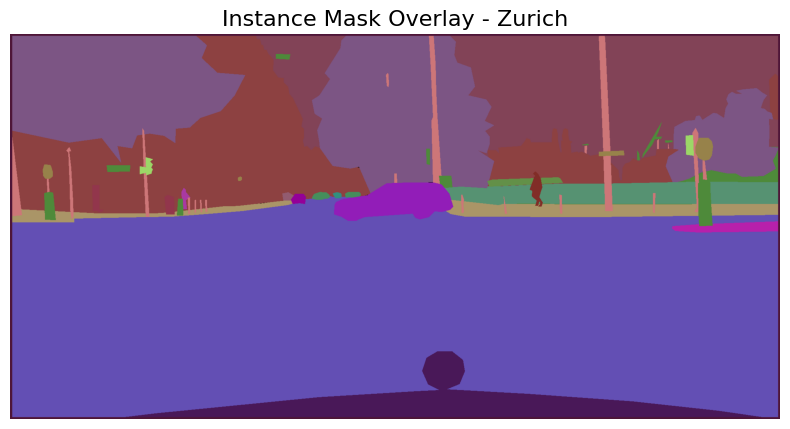

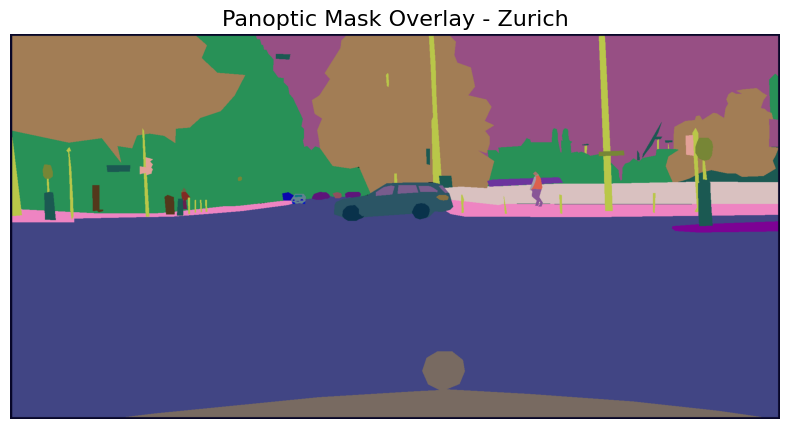

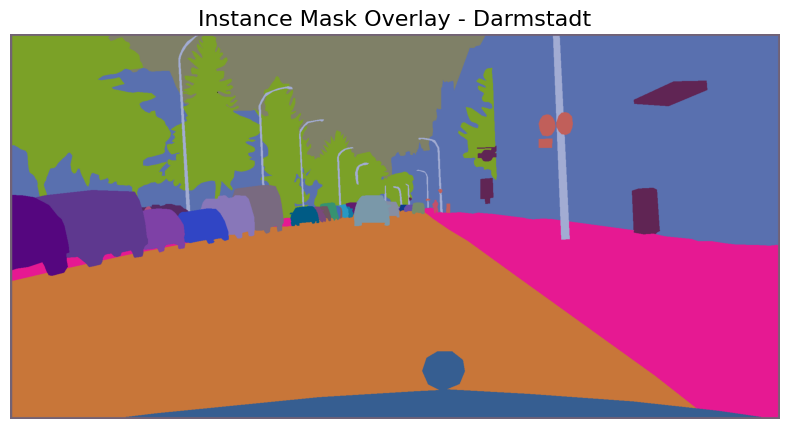

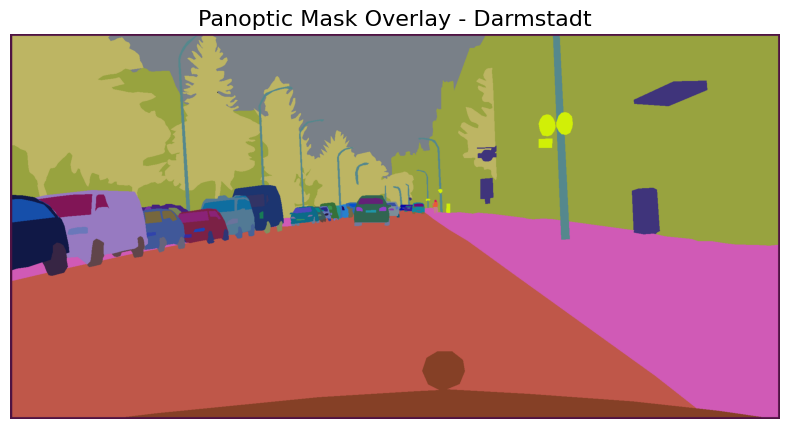

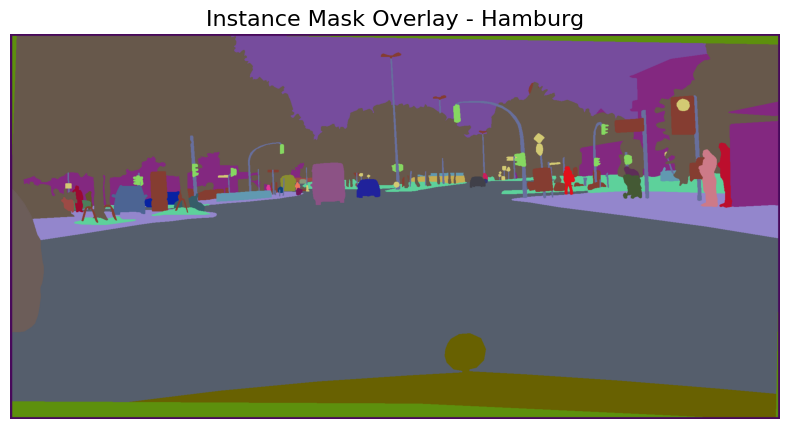

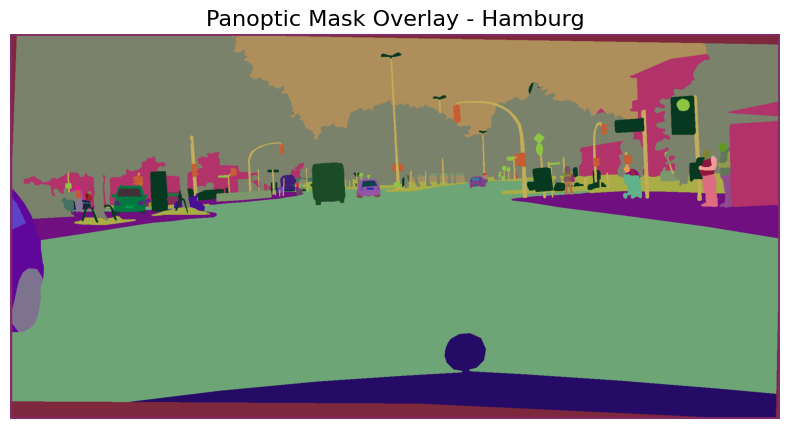

In [78]:
def overlay_masks(color_image_path, mask_image_path, title, alpha=0.6):
    # Load images
    color_image = np.array(Image.open(color_image_path))
    mask_image = np.array(Image.open(mask_image_path))

    # Ensure color image is RGB (drop alpha if present)
    if color_image.shape[-1] == 4:
        color_image = color_image[..., :3]

    # Ensure mask image is 2D
    if mask_image.ndim > 2:
        mask_image = mask_image[..., 0]  # Use only the first channel

    # Initialize an RGB mask array
    mask_image_resized = np.zeros((*mask_image.shape, 3), dtype=np.uint8)

    # Assign random colors to unique IDs in the mask
    unique_ids = np.unique(mask_image)
    for uid in unique_ids:
        if uid != 0:  # Skip the background
            color = np.random.randint(0, 255, size=(3,), dtype=np.uint8)
            mask_image_resized[mask_image == uid] = color

    # Combine the color image and mask with transparency
    overlayed_image = (1 - alpha) * color_image + alpha * mask_image_resized
    overlayed_image = overlayed_image.astype(np.uint8)

    # Plot the result
    plt.figure(figsize=(10, 5))
    plt.imshow(overlayed_image)
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Select sample paths
for city in selected_cities:
    color_image_path = os.path.join(gtFine_CorePath, "train", city, gtFine_city_files_sorted[city][0])  # Color image
    instance_mask_path = os.path.join(gtFine_CorePath, "train", city, gtFine_city_files_sorted[city][1])  # Instance mask
    panoptic_mask_path = os.path.join(gtFinePano_CorePath, "train", city, gtFinePano_city_files_sorted[city][0])  # Panoptic segmentation mask

    # Overlay instance mask
    overlay_masks(color_image_path, instance_mask_path, f"Instance Mask Overlay - {city.capitalize()}")

    # Overlay panoptic mask
    overlay_masks(color_image_path, panoptic_mask_path, f"Panoptic Mask Overlay - {city.capitalize()}")


In [79]:
# # Load a sample instance mask and analyze unique IDs
# sample_instance_array = np.array(instance_image)
# unique_instance_ids = np.unique(sample_instance_array)
# instance_id_count = Counter(sample_instance_array.flatten())

# # Summary of dataset structure and annotations
# gtFine_train_counts_summary = len(gtFine_city_trainImg_count), sum(gtFine_city_trainImg_count.values())
# gtFine_val_counts_summary = len(gtFine_val_counts), sum(gtFine_val_counts.values())
# gtFine_test_counts_summary = len(gtFine_test_counts), sum(gtFine_test_counts.values())
# gtFinePanopticParts_train_counts_summary = len(gtFinePano_train_counts), sum(gtFinePano_train_counts.values())
# gtFinePanopticParts_val_counts_summary = len(gtFinePano_val_counts), sum(gtFinePano_val_counts.values())

# (gtFine_train_counts_summary, gtFine_val_counts_summary, gtFine_test_counts_summary,
#  gtFinePanopticParts_train_counts_summary, gtFinePanopticParts_val_counts_summary,
#  unique_instance_ids[:10], instance_id_count.most_common(5))